[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://tinyurl.com/yns4g4sq)

# Estudio Comparativo de Algoritmos de Clasificación para la Calidad de Vinos

## Introducción

En este notebook, se realizará un estudio comparativo de modelos de clasificación para la calidad de vinos. El dataset utilizado es el [Wine Quality Dataset](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset/code) de la Kaggle, que contiene 11 variables predictoras y una variable objetivo, que es la calidad del vino.


**Los pasos a seguir para el desarrollo del notebook son los siguientes:**

1. Comprensión del problema
2. Análisis exploratorio de datos
3. Preprocesamiento de datos
4. Modelado
5. Evaluación de modelos
6. Conclusiones

**Los modelos a comparar son:**

* Regresión logística
* Árbol de decisión
* Random Forest
* Máquina de soporte vectorial
* Naive Bayes
* K-Nearest Neighbors
* Ensemble de modelos



## 1. Comprensión del problema

El problema consiste en predecir la calidad de un vino a partir de sus características fisicoquímicas. La variable objetivo es la calidad del vino, que es un valor entre 3 y 8 en donde 3 es la peor calidad y 8 la mejor. Las variables predictoras son 11 características fisicoquímicas del vino.

Características del dataset:

- fixed acidity (Acidez fija) : la mayoría de los ácidos del vino son fijos o no volátiles (no se evaporan fácilmente).
- volatile acidity (Acidez volátil) : la cantidad de ácido acético en el vino, que en niveles demasiado altos puede producir un sabor desagradable a vinagre.
- citric acid (Ácido cítrico) : presente en pequeñas cantidades, el ácido cítrico puede aportar "frescor" y sabor a los vinos.
- residual sugar (Azúcar residual) : la cantidad de azúcar que queda después de parar la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y los vinos con más de 45 gramos/litro se consideran dulces.
- chlorides (Cloruros) : la cantidad de sal en el vino.
- free sulfur dioxide (Dióxido de azufre libre) : la forma libre de SO2 existe en equilibrio entre el SO2 molecular (como gas disuelto) y el ion bisulfito; impide el crecimiento microbiano y la oxidación del vino.
- total sulfur dioxide (Dióxido de azufre total) : cantidad de formas libres y ligadas de S02; en concentraciones bajas, el SO2 es casi indetectable en el vino, pero en concentraciones de SO2 libre superiores a 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
- density (Densidad) : la densidad se aproxima a la del agua en función del porcentaje de alcohol y del contenido de azúcar.
- pH : describe lo ácido o básico que es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos se sitúan entre 3-4 en la escala de pH.
- sulphates (Sulfatos) : aditivo del vino que puede contribuir a los niveles de gas sulfuroso (S02), que actúa como antimicrobiano y antioxidante.
- alcohol : porcentaje de alcohol contenido en el vino.
- quality(Calidad) : calificación de la calidad del vino.

Debido a que la variable objetivo es discreta, se trata de un problema de clasificación multiclase.

## 2. Análisis exploratorio de datos

En esta sección se realizará un análisis exploratorio de datos para comprender mejor el dataset y las relaciones entre las variables.

### Pasos Clave:

* **Carga de Datos**

Se cargarán los datos en un DataFrame de Pandas para su posterior análisis. Se utilizará la función `head()` para visualizar las primeras filas del conjunto de datos.

* **Información del Dataset**

Se utilizará la función `info()` para obtener información sobre el conjunto de datos, como el número de filas y columnas, el tipo de datos de cada variable y la cantidad de valores no nulos.

* **Estadísticas Descriptivas**

Se calcularán estadísticas descriptivas para cada variable, como medias, medianas, desviaciones estándar y cuartiles. Esto proporcionará una comprensión inicial de la distribución y la dispersión de los datos.

* **Visualización de Datos**

Se utilizarán gráficos y visualizaciones para representar las relaciones entre diferentes variables. Histogramas, diagramas de dispersión y boxplots ayudarán a identificar posibles correlaciones y outliers en el conjunto de datos.


* **Correlación entre Variables**
  
Se analizará la correlación entre las variables para comprender las relaciones lineales potenciales. Esto es crucial para seleccionar las características más relevantes en fases posteriores.
 

**Resultados Esperados:**

- **Identificación de Tendencias:** Descubrimiento de patrones o tendencias notables en los datos.
- **Detección de Outliers:** Identificación de posibles valores atípicos que puedan afectar la precisión del modelo.
- **Entendimiento de Correlaciones:** Comprensión de las relaciones entre las variables y su relevancia para la predicción.
- **Selección de Características:** Identificación de las variables más influyentes para la predicción.

Este análisis exploratorio establecerá una base sólida para la siguiente fase, donde se realizará la preparación de los datos antes de la construcción y evaluación de modelos de aprendizaje automático.

### 2.1 Carga de Datos

In [112]:
# verificar si estamos en google colab
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

In [113]:
if IN_COLAB:
    # download a folder from github
    !wget -O datasets.zip https://github.com/DiegoPaezA/CienciaDatos-MASDI/archive/refs/heads/main.zip
    !unzip datasets.zip
    !mv CienciaDatos-MASDI-main/datasets datasets_github
    !rm -rf datasets.zip CienciaDatos-MASDI-main

In [114]:
import os
# Obtener el directorio raíz del proyecto
dir_root = os.path.dirname(os.getcwd())

In [115]:
# Importamos la biblioteca pandas
import pandas as pd

# definimos la ruta del dataset a cargar
datasets_folder_name = 'content/datasets_github' if IN_COLAB else 'datasets'
ruta_dataset = os.path.join(dir_root, datasets_folder_name, 'classification', 'WineQT.csv')

# Cargamos el dataset
data = pd.read_csv(ruta_dataset)

# Mostramos las primeras 5 filas del dataset
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


## Exploración de los Datos

En esta sección se realizará un análisis exploratorio de datos para comprender mejor el dataset y las relaciones entre las variables.

### 2.2 Información del Dataset

Se utilizará la función `info()` para obtener información sobre el conjunto de datos, como el número de filas y columnas, el tipo de datos de cada variable y la cantidad de valores no nulos.

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


Adicionalmente, es posible obtener información sobre el número de valores null en cada columna utilizando la función `isnull()`.

In [117]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

**Conclusiones:**

- No hay valores nulos en el dataset
- Todas las variables son numéricas
- Hay un total de 1143 registros
- Hay 12 variables predictoras y 1 variable objetivo
- La variable objetivo es la calidad del vino
- Las variables predictoras son características fisicoquímicas del vino
- La variable objetivo es discreta, tiene valores enteros.


### 2.3 Estadísticas Descriptivas

Se calcularán estadísticas descriptivas para cada variable, como medias, medianas, desviaciones estándar y cuartiles. Esto proporcionará una comprensión inicial de la distribución y la dispersión de los datos.

In [118]:
data.describe().round(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00
mean,8.31,0.53,0.27,2.53,0.09,15.62,45.91,1.00,3.31,0.66,10.44,5.66,804.97
std,1.75,0.18,0.20,1.36,0.05,10.25,32.78,0.00,0.16,0.17,1.08,0.81,464.00
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00,0.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,21.00,1.00,3.20,0.55,9.50,5.00,411.00
50%,7.90,0.52,0.25,2.20,0.08,13.00,37.00,1.00,3.31,0.62,10.20,6.00,794.00
75%,9.10,0.64,0.42,2.60,0.09,21.00,61.00,1.00,3.40,0.73,11.10,6.00,1209.50
max,15.90,1.58,1.00,15.50,0.61,68.00,289.00,1.00,4.01,2.00,14.90,8.00,1597.00


**Conclusiones:**

- Las variables predictoras tienen diferentes escalas-> es necesario normalizar los datos 


### 2.4 Visualización de Datos

Se utilizarán gráficos y visualizaciones para representar las relaciones entre diferentes variables. Histogramas, diagramas de dispersión y boxplots ayudarán a identificar posibles correlaciones y outliers en el conjunto de datos.

- **Histogramas:** Se utilizarán histogramas para visualizar la distribución de las variables predictoras y la variable objetivo. Esto ayudará a identificar posibles outliers y a comprender mejor la distribución de los datos.
- **Diagramas de Densidad:** Se utilizarán diagramas de densidad para visualizar la distribución de las variables predictoras en función de las clases de la variable objetivo. Esto ayudará a identificar cualquier diferencia significativa en la distribución de las variables predictoras para cada clase de la variable objetivo.
- **Boxplots:** Se utilizarán boxplots para visualizar la distribución de las variables predictoras y la variable objetivo. Esto ayudará a identificar posibles outliers y a comprender mejor la distribución de los datos.

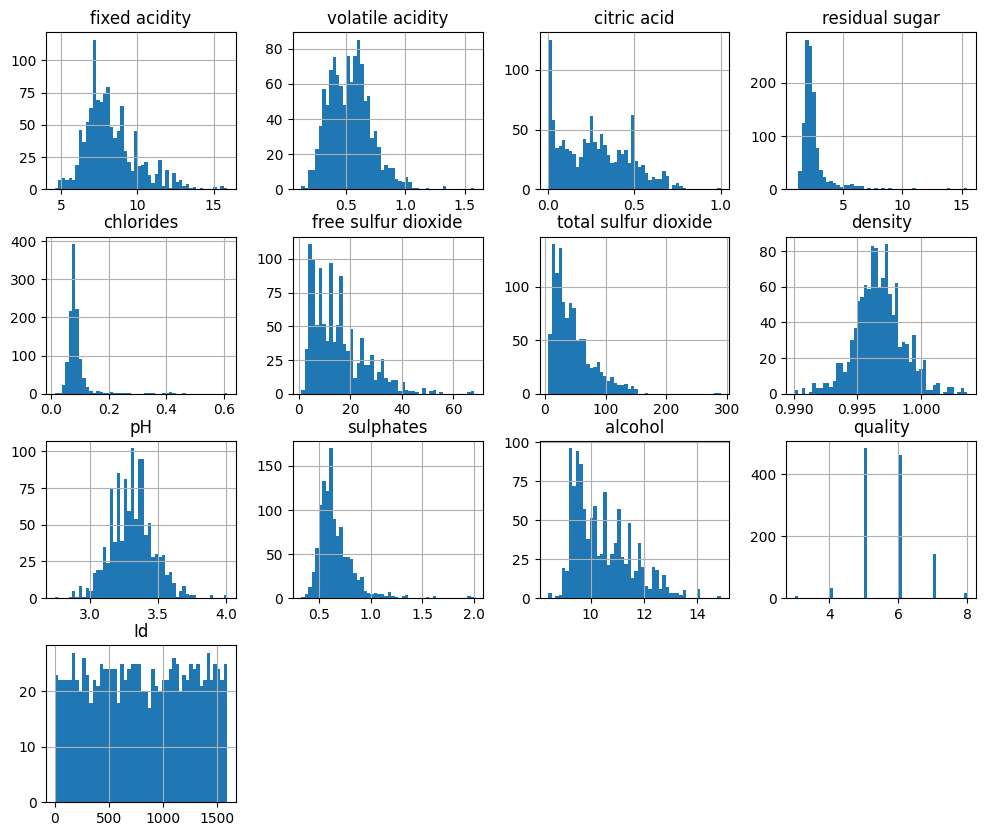

In [119]:
# Importamos las librearías necesarias
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma del dataset
data.hist(bins=50, figsize=(12,10))
plt.show()

**Conclusiones de los Histogramas:**

- **fixed acidity:** La mayoría de los vinos tienen una acidez fija entre 6 y 8.
- **volatile acidity:** La mayoría de los vinos tienen una acidez volátil entre 0.2 y 0.6.
- **citric acid:** La mayoría de los vinos tienen un ácido cítrico entre 0 y 0.5.
- **residual sugar:** La mayoría de los vinos tienen un azúcar residual entre 0 y 5.
- **chlorides:** La mayoría de los vinos tienen cloruros entre 0 y 0.1.
- **free sulfur dioxide:** La mayoría de los vinos tienen dióxido de azufre libre entre 0 y 50.
- **total sulfur dioxide:** La mayoría de los vinos tienen dióxido de azufre total entre 0 y 150.
- **density:** La mayoría de los vinos tienen una densidad entre 0.99 y 1.
- **pH:** La mayoría de los vinos tienen un pH entre 3 y 3.5.
- **sulphates:** La mayoría de los vinos tienen sulfatos entre 0.4 y 0.8.
- **alcohol:** La mayoría de los vinos tienen un contenido de alcohol entre 9 y 11.
- **quality:** La mayoría de los vinos tienen una calidad entre 5 y 6.
- La variable objetivo tiene 6 valores posibles: 3, 4, 5, 6, 7 y 8. Los cuales tienen una distribución desbalanceada.
- El atributo id no es relevante para el análisis, ya que es un identificador único para cada registro.

In [120]:
data.drop('Id', axis=1, inplace=True)

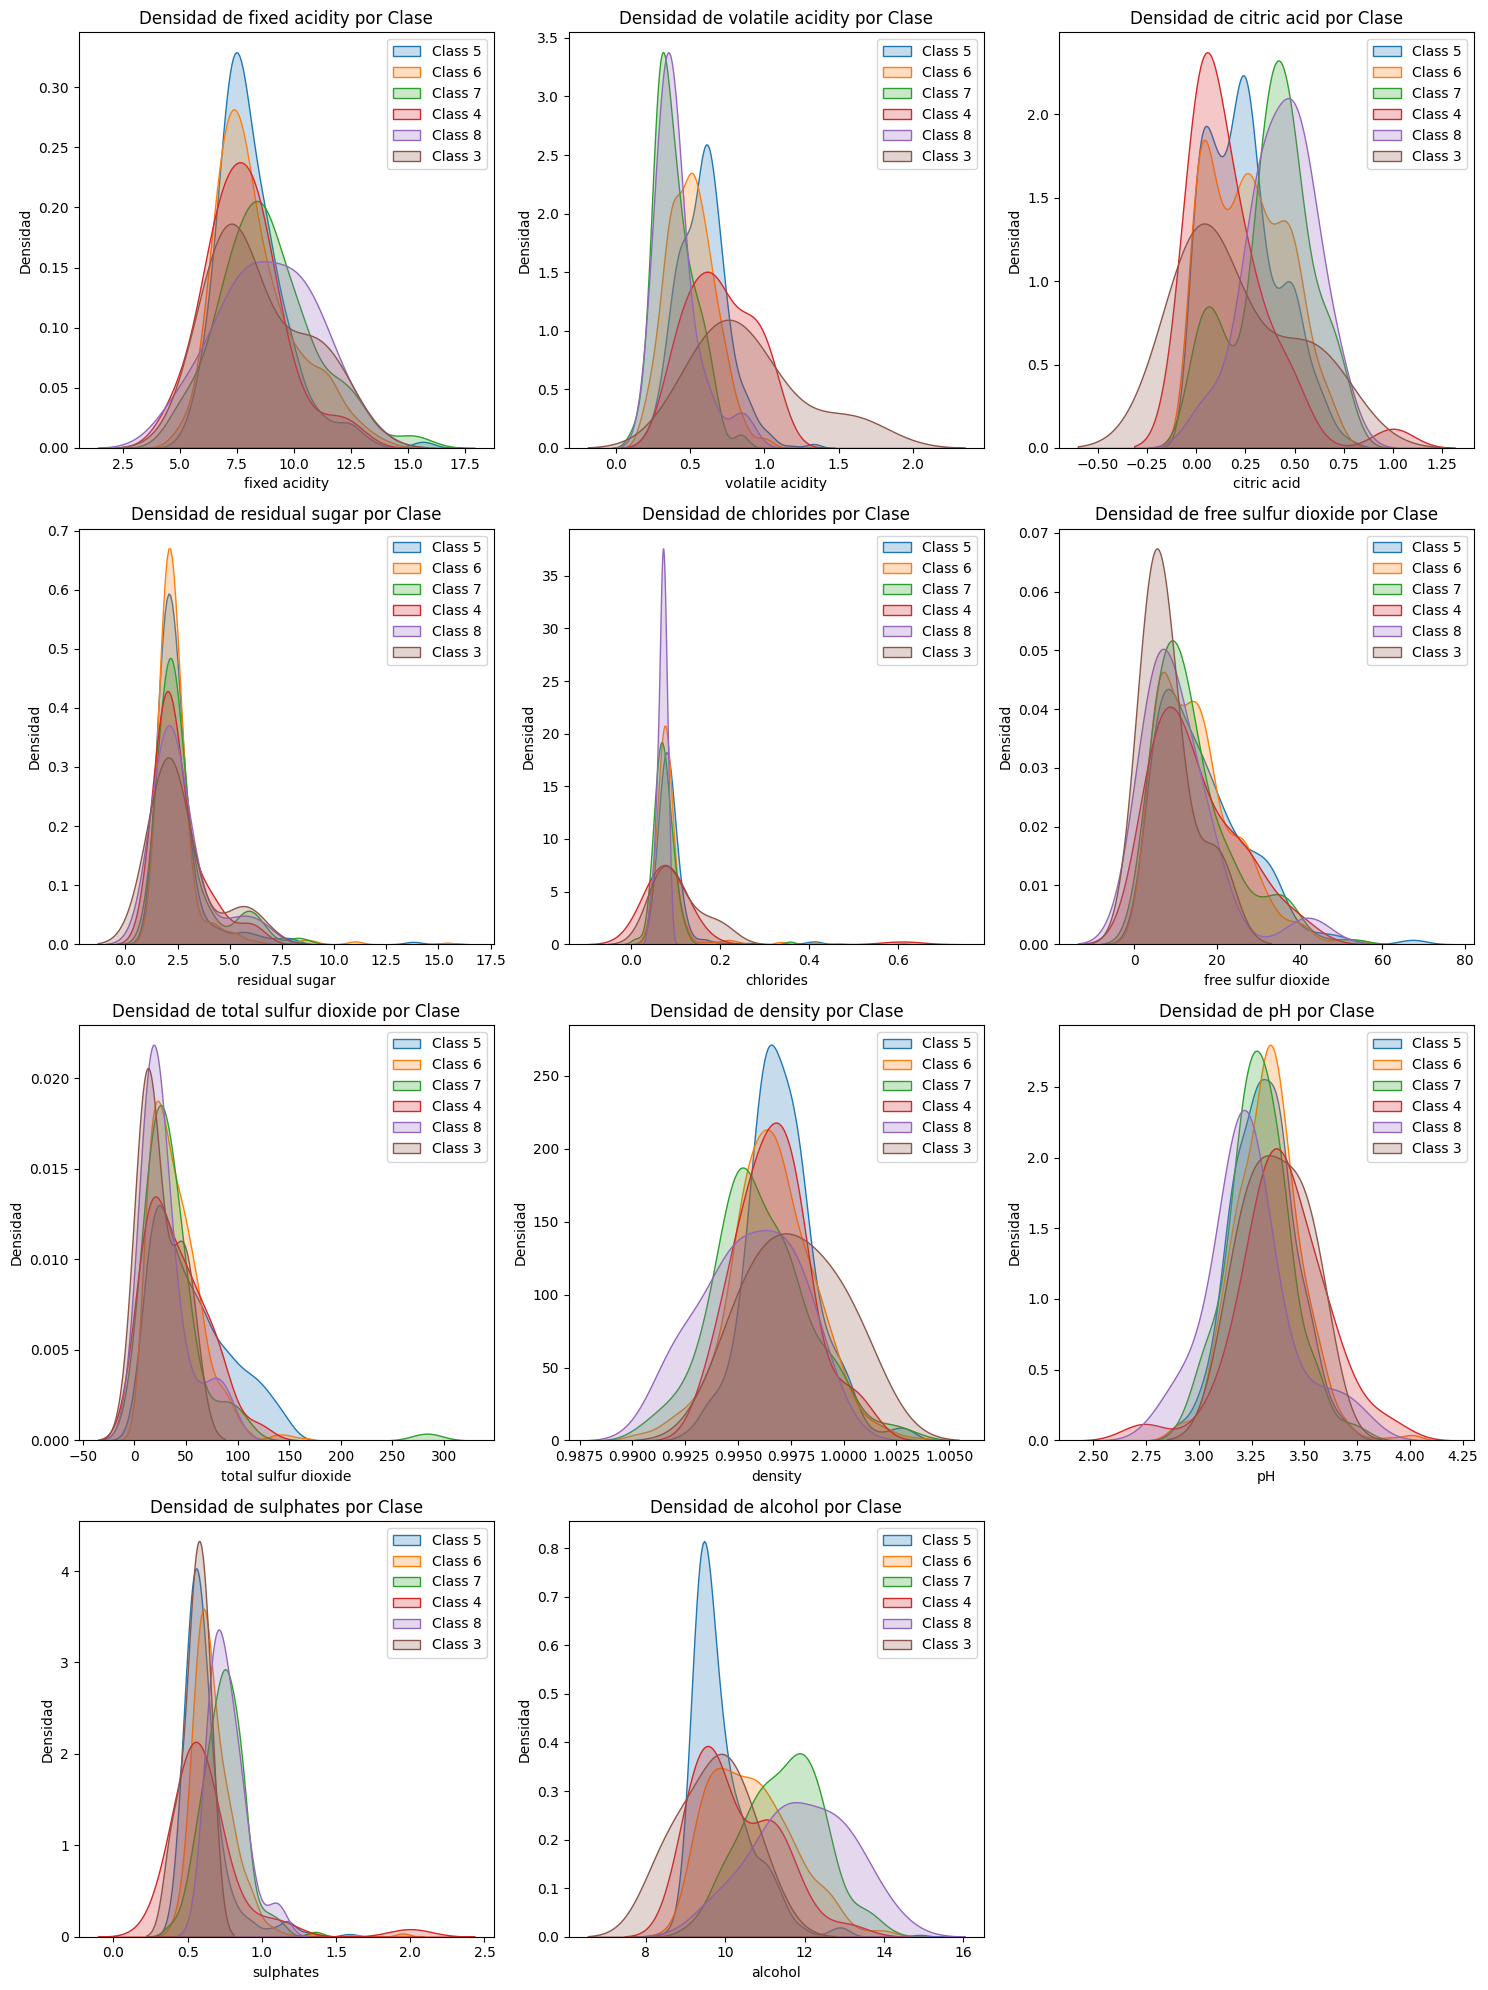

In [121]:
# Diagrama de densidad de cada atributo por clase de calidad
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Asumiendo que 'data' es tu DataFrame y 'quality' es tu columna objetivo
columns = data.drop('quality', axis=1).columns
n = len(columns)
ncols = 3
nrows = np.ceil(n / ncols).astype(int)

fig, axs = plt.subplots(nrows, ncols, figsize=(15, nrows*5))

for ax, column in zip(axs.flatten(), columns):
    for class_value in data['quality'].unique():
        sns.kdeplot(data[data['quality'] == class_value][column], label=f'Class {class_value}', ax=ax, fill=True)
    ax.set_title(f'Densidad de {column} por Clase')
    ax.set_xlabel(column)
    ax.set_ylabel('Densidad')
    ax.legend()

# Eliminar los subgráficos vacíos
for i in range(n, nrows*ncols):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()

Un diagrama de densidad es una representación gráfica de la distribución de los datos utilizando una curva de densidad. Los diagramas de densidad se utilizan para visualizar la distribución de los datos y son especialmente útiles para comparar la distribución de los datos entre diferentes grupos o categorías.

Para interpretar un diagrama de densidad, se debe prestar atención a la forma de la curva (forma de campana, bimodal, etc.) y a la posición de la curva (izquierda, derecha, centrada, etc.). También es posible comparar la forma y la posición de varias curvas de densidad para identificar diferencias significativas en la distribución de los datos con respecto a las diferentes categorías del atributo objetivo.

Si la forma de la curva es una campana simétrica, esto sugiere una distribución normal de los datos. Si la curva es asimétrica o tiene múltiples picos, esto sugiere una distribución no normal de los datos. 

- Una distribución normal implica simetría, consistencia, y permite la aplicación de técnicas estadísticas y de machine learning que asumen esa forma de distribución, facilitando el análisis y la interpretación de los datos.
- Una distribución no normal puede requerir transformaciones de los datos o el uso de técnicas estadísticas no paramétricas para su análisis.
  
**Conclusiones de los Diagramas de Densidad:**

- El análisis de los diagramas de densidad muestra algunas de las variables predictoras tienen distribuciones diferentes dependiendo de la clase de la variable objetivo. Esto sugiere que estas variables pueden ser útiles para predecir la calidad del vino. Por ejemplo la variable "alcohol" tiene una distribución diferente para cada clase de la variable objetivo.

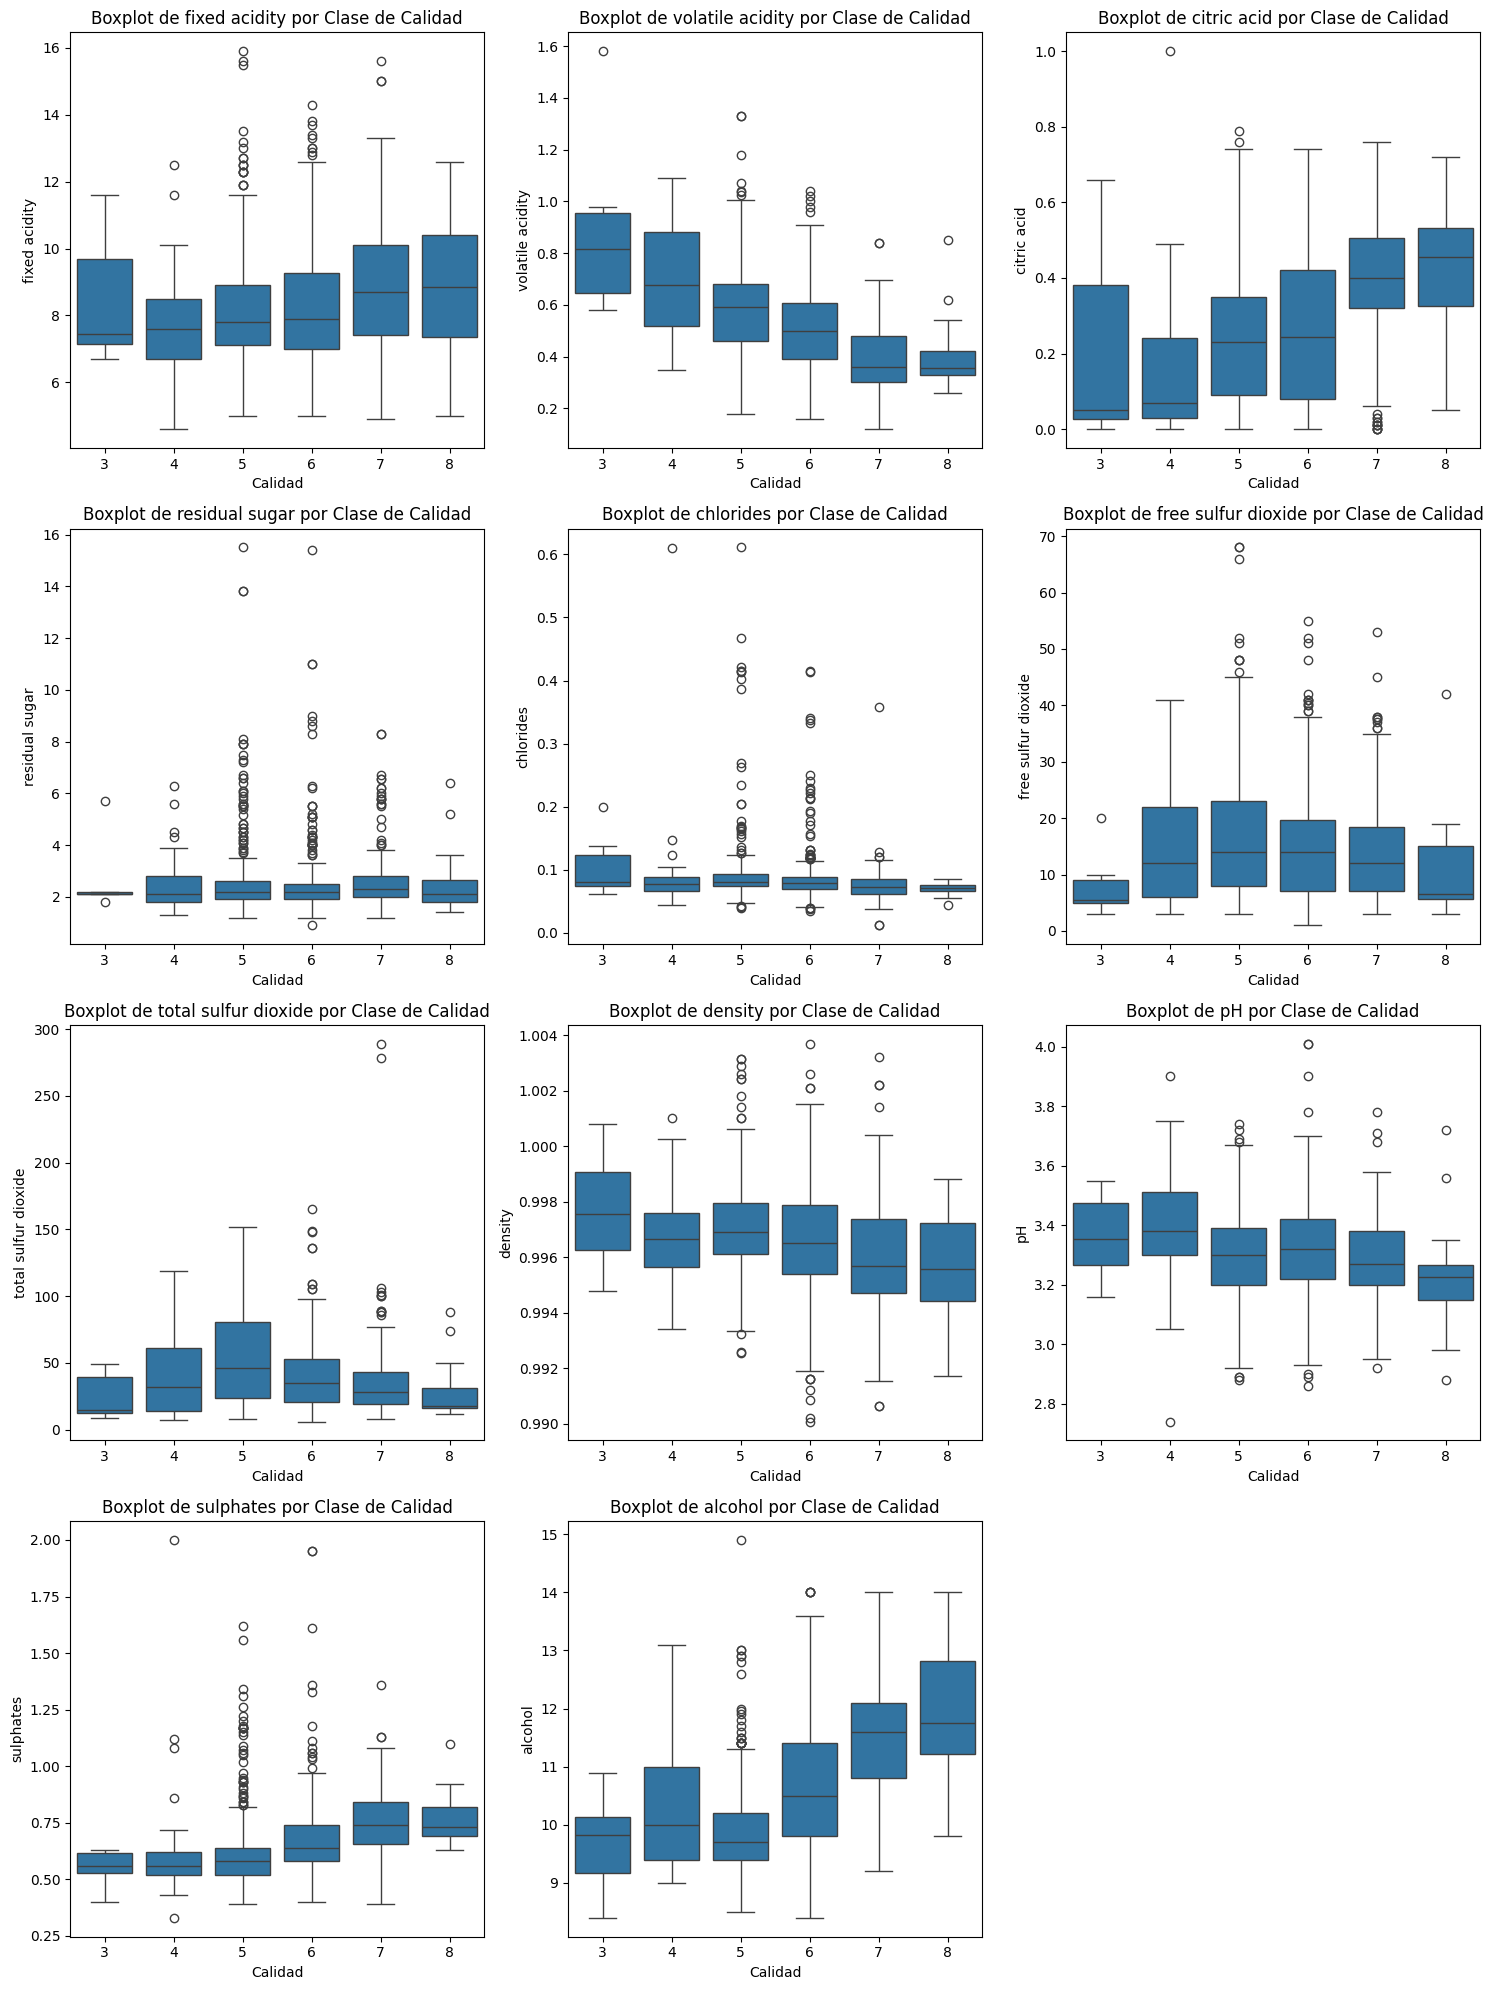

In [122]:
# Diagrama de cajas de cada atributo por clase de calidad
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que 'data' es tu DataFrame y 'quality' es tu columna objetivo
columns = data.drop('quality', axis=1).columns
n = len(columns)
ncols = 3
nrows = np.ceil(n / ncols).astype(int)

fig, axs = plt.subplots(nrows, ncols, figsize=(15, nrows*5))

for ax, column in zip(axs.flatten(), columns):
    sns.boxplot(x='quality', y=column, data=data, ax=ax)
    ax.set_title(f'Boxplot de {column} por Clase de Calidad')
    ax.set_xlabel('Calidad')
    ax.set_ylabel(column)

# Eliminar los subgráficos vacíos
for i in range(n, nrows*ncols):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()

Un diagrama boxplot, también conocido como diagrama de caja, es una representación gráfica que muestra la distribución de un conjunto de datos numéricos a través de sus cuartiles. Aquí te explico cómo interpretar un boxplot:

- **Línea central (Mediana)**: La línea que divide la caja en dos partes representa la mediana o segundo cuartil de los datos. Esto indica el valor medio del conjunto de datos, donde la mitad de los datos son menores y la otra mitad son mayores.
- **Caja (Intervalo Interquartílico)**: La caja del boxplot representa el intervalo interquartílico (IQR), que es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). Esto muestra dónde se concentra la mitad central de los datos.
- **Bigotes (Valores Máximo y Mínimo)**: Los bigotes del boxplot se extienden desde la caja hasta los valores máximo y mínimo dentro de un límite determinado, que suele ser 1.5 veces el IQR por encima y por debajo de los cuartiles. Los datos fuera de estos límites se consideran valores atípicos.
- **Valores Atípicos (Outliers)**: Los puntos que se encuentran fuera de los bigotes se consideran valores atípicos o extremos. Estos pueden indicar variabilidad en los datos o posibles errores de medición.
- **Simetría y Sesgo**: La posición de la mediana dentro de la caja puede indicar si los datos están sesgados. Si la mediana está cerca del primer cuartil, los datos pueden estar sesgados hacia la derecha; si está cerca del tercer cuartil, pueden estar sesgados hacia la izquierda.

**Conclusiones de los Boxplots:**

- Los boxplots muestran la distribución de las variables predictoras y la variable objetivo. Se puede observar que algunas variables tienen outliers, como "residual sugar", "free sulfur dioxide" y "total sulfur dioxide". Esto puede afectar negativamente a los modelos de aprendizaje automático, por lo que es necesario realizar un preprocesamiento de datos para eliminar los outliers.
- Debido a que el dataset es pequeño con 1143 registros, en este ejemplo no se eliminarán los outliers. Sin embargo, en un caso real, se recomienda eliminar los outliers para mejorar la precisión del modelo.

### 2.5 Correlación entre Variables

La correlación es una medida estadística que describe la relación entre dos variables. Las variables pueden tener una correlación positiva, una correlación negativa o no tener correlación. Una correlación positiva significa que cuando el valor de una variable aumenta, el valor de la otra variable también aumenta. Una correlación negativa significa que cuando el valor de una variable aumenta, el valor de la otra variable disminuye. Una correlación de cero significa que no hay relación entre las dos variables.

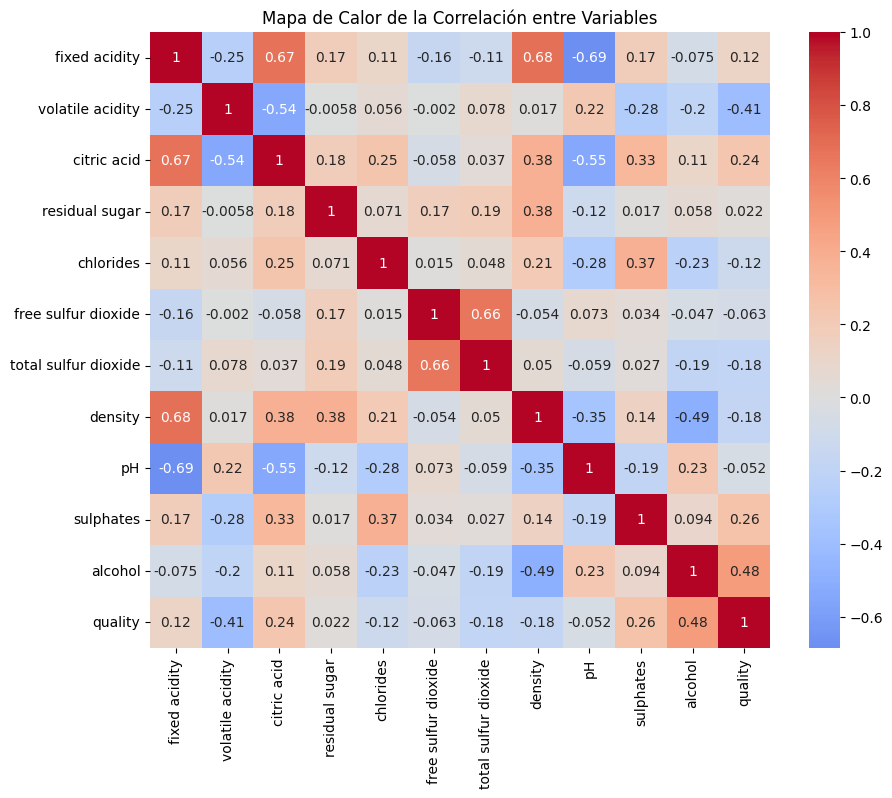

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que 'data' es tu DataFrame
correlation = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de la Correlación entre Variables')
plt.show()

**Conclusiones de la Correlación:**

- Se puede observar que el atributo `fixed acidity` tiene una correlación positiva con los atributos `citric acid` y `density`. Esto significa que cuando el valor de `fixed acidity` aumenta, el valor de `citric acid` y `density` también aumenta. Por otro lado, el atributo `fixed acidity` tiene una correlación negativa con el atributo `pH`. Esto significa que cuando el valor de `fixed acidity` aumenta, el valor de `pH` disminuye.
- El atributo `free sulfur dioxide` tiene una correlación positiva con el atributo `total sulfur dioxide`. Esto significa que cuando el valor de `free sulfur dioxide` aumenta, el valor de `total sulfur dioxide` también aumenta.
- El atributo `volatile acidity` tiene una correlación negativa significativa con el atributo `quality`. Esto significa que cuando el valor de `volatile acidity` aumenta, el valor de `quality` disminuye. Esto tiene sentido, ya que un vino con una acidez volátil alta tiene un sabor desagradable a vinagre.
- El atributo `alcohol` tiene una correlación positiva significativa con el atributo `quality`. Esto significa que cuando el valor de `alcohol` aumenta, el valor de `quality` también aumenta. Esto tiene sentido, ya que un vino con un contenido de alcohol alto tiene un mejor sabor.

Como se puede observar, el análisis de correlación es una herramienta útil para comprender las relaciones entre las variables. Esto es crucial para seleccionar las características más relevantes en fases posteriores.

Una alta correlación entre dos variables se denomina multicolinealidad. La multicolinealidad puede afectar negativamente a los modelos de aprendizaje automático, ya que puede aumentar la varianza de los coeficientes de los modelos. Por lo tanto, es importante identificar las variables altamente correlacionadas y eliminarlas del conjunto de datos.

### Conclusiones del Análisis Exploratorio de Datos

- **Identificación de Tendencias**: Descubrimiento de patrones o tendencias notables en los datos.
  - Las variables predictoras tienen diferentes escalas-> es necesario normalizar los datos
  - La variable objetivo tiene 6 valores posibles: 3, 4, 5, 6, 7 y 8. Los cuales tienen una distribución desbalanceada.
  - El atributo id no es relevante para el análisis, ya que es un identificador único para cada registro.
  - El análisis de los diagramas de densidad muestra algunas de las variables predictoras tienen distribuciones diferentes dependiendo de la clase de la variable objetivo. Esto sugiere que estas variables pueden ser útiles para predecir la calidad del vino. Por ejemplo la variable "alcohol" tiene una distribución diferente para cada clase de la variable objetivo.
  - El análisis de correlación mostró que algunas variables tienen una correlación positiva o negativa significativa con la variable objetivo.
  - El análisis de correlación mostró que algunas variables tienen una correlación positiva o negativa significativa entre sí. Esto puede afectar negativamente a los modelos de aprendizaje automático, debido al problema de la multicolinealidad.
  
- **Detección de Outliers**: Identificación de posibles valores atípicos que puedan afectar la precisión del modelo.
  - Algunas variables tienen outliers, como "residual sugar", "free sulfur dioxide" y "total sulfur dioxide". Esto puede afectar negativamente a los modelos de aprendizaje automático, por lo que es necesario realizar un preprocesamiento de datos para eliminar los outliers. En este ejemplo no se eliminarán los outliers debido al tamaño del dataset (1143 registros).
- **Selección de Características**: Identificación de las variables más influyentes en la predicción del costo del seguro médico.
  - Los atributos `volatile acidity` y `alcohol` tienen una correlación significativa con la variable objetivo. Esto significa que estos atributos pueden ser útiles para predecir la calidad del vino.
  - Los atributos `fixed acidity`, `citric acid`, `density`, `pH`, `free sulfur dioxide` y `total sulfur dioxide` tienen una correlación significativa entre sí. Esto puede afectar negativamente a los modelos de aprendizaje automático, debido al problema de la multicolinealidad. Por lo tanto, es necesario eliminar algunas de estas variables del conjunto de datos. Se eliminarán los atributos `fixed acidity` y `free sulfur dioxide` debido a su baja correlación con la variable objetivo.

## 3. Preprocesamiento de Datos

En esta sección se realizará un preprocesamiento de datos para preparar el dataset para la construcción de modelos de aprendizaje automático. El preprocesamiento de datos es una etapa crucial en el desarrollo de modelos de aprendizaje automático, ya que puede afectar significativamente a la precisión del modelo.

### Pasos Clave:

- **Eliminación de Variables:** Se eliminarán las variables que no son relevantes para el análisis o que tienen una correlación significativa con otras variables.
  - Se eliminará el atributo `id` porque es un identificador único para cada registro.
  - Se eliminará el atributo `fixed acidity` debido a que presenta alta correlación con los atributos `citric acid`, `density` y `pH`.
  - Se eliminará el atributo `free sulfur dioxide` debido a que presenta alta correlación con el atributo `total sulfur dioxide` y baja correlación con la variable objetivo.
- **Normalización de Datos:** Se normalizarán los datos para que todas las variables tengan la misma escala.
- **División de Datos:** Se dividirán los datos en un conjunto de entrenamiento y un conjunto de prueba. El conjunto de entrenamiento se utilizará para entrenar los modelos de aprendizaje automático y el conjunto de prueba se utilizará para evaluar la precisión de los modelos.

### 3.1 Eliminación de Variables

Se eliminarán las variables que no son relevantes para el análisis o que tienen una correlación significativa con otras variables.


In [124]:
# eliminamos las columnas 'fixed acidity' y 'free sulfur dioxide'
data = data.drop(['fixed acidity', 'free sulfur dioxide'], axis=1)

### 3.2 Normalización de Datos

Se normalizarán los datos para que todas las variables tengan la misma escala. Esto es importante porque las variables con una escala más grande pueden tener un mayor impacto en los modelos de aprendizaje automático. Por ejemplo, si una variable tiene valores entre 0 y 1 y otra variable tiene valores entre 0 y 1000, la segunda variable puede tener un mayor impacto en los modelos de aprendizaje automático. Por lo tanto, es necesario normalizar los datos para que todas las variables tengan la misma escala.

In [125]:
from sklearn.preprocessing import MinMaxScaler

# La columna objetivo es 'quality' no la normalizamos
features = data.drop('quality', axis=1)
scaler = MinMaxScaler()
features_normalized = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Agregar la columna objetivo de nuevo al DataFrame
data_normalized = pd.concat([features_normalized, data['quality']], axis=1)
data_normalized.describe().round(2)

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00,1143.00
mean,0.28,0.27,0.11,0.13,0.14,0.49,0.45,0.20,0.31,5.66
std,0.12,0.20,0.09,0.08,0.12,0.14,0.12,0.10,0.17,0.81
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00
25%,0.19,0.09,0.07,0.10,0.05,0.40,0.37,0.13,0.17,5.00
50%,0.27,0.25,0.09,0.11,0.11,0.49,0.45,0.17,0.28,6.00
75%,0.36,0.42,0.12,0.13,0.19,0.57,0.52,0.24,0.42,6.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,8.00


### 3.3 División de Datos en Conjuntos de Entrenamiento y Prueba

Se dividirán los datos en un conjunto de entrenamiento y un conjunto de prueba. El conjunto de entrenamiento se utilizará para entrenar los modelos de aprendizaje automático y el conjunto de prueba se utilizará para evaluar la precisión de los modelos. Se utilizará un 80% de los datos para el conjunto de entrenamiento y un 20% de los datos para el conjunto de prueba.

- *observación:* **random_state=42**, es un valor fijo que garantiza que la división de los datos sea reproducible. Esto significa que si se ejecuta el código varias veces, se obtendrán las mismas divisiones de datos. En un caso real, se puede utilizar un valor aleatorio para random_state, con el objetivo de obtener diferentes divisiones de datos en cada ejecución y evaluar la robustez del modelo.


In [126]:
from sklearn.model_selection import train_test_split

# separar las variables predictoras de la variable objetivo
X = data_normalized.drop('quality', axis=1)
y = data_normalized['quality']

# dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((914, 9), (229, 9), (914,), (229,))

## 4. Modelado

En esta sección se construirán y evaluarán varios modelos de aprendizaje automático para predecir la calidad del vino. Se utilizarán los siguientes modelos:

* Regresión logística
* Árbol de decisión
* Random Forest
* Máquina de soporte vectorial
* Naive Bayes
* K-Nearest Neighbors
* XGBoost
* Ensemble de modelos

In [ ]:
# install xgboost
if IN_COLAB:
    !pip install xgboost --quiet

In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier

# Asumiendo que 'X_train' y 'y_train' son tus conjuntos de entrenamiento

# Inicializar los modelos
logistic_regression = LogisticRegression()
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()
naive_bayes = GaussianNB()
knn = KNeighborsClassifier()
xgboost = XGBClassifier()
# Crear un ensemble de modelos
ensemble = VotingClassifier(estimators=[
    ('logistic_regression', logistic_regression),
    ('decision_tree', decision_tree),
    ('random_forest', random_forest),
    ('svm', svm),
    ('naive_bayes', naive_bayes),
    ('knn', knn)
])

*El modelo xgboost espera que las etiquetas de clase sean enteros, ordenados de 0 a n-1. En este caso, las etiquetas de clase son 3, 4, 5, 6, 7 y 8. Por lo tanto, es necesario convertir las etiquetas de clase a enteros ordenados de 0 a 5.*

In [128]:
from sklearn.preprocessing import LabelEncoder

# Inicializar el codificador
le = LabelEncoder()

# Transformar las etiquetas de entrenamiento
y_train = le.fit_transform(y_train)

# Transformar las etiquetas de prueba
y_test = le.transform(y_test)

In [129]:
# Entrenar los modelos
logistic_regression.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)
knn.fit(X_train, y_train)
xgboost.fit(X_train, y_train) 
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('logistic_regression', LogisticRegression()),
                             ('decision_tree', DecisionTreeClassifier()),
                             ('random_forest', RandomForestClassifier()),
                             ('svm', SVC()), ('naive_bayes', GaussianNB()),
                             ('knn', KNeighborsClassifier())])

## 5. Evaluación de Modelos

En esta sección se evaluarán los modelos de aprendizaje automático utilizando métricas de evaluación. Las métricas de evaluación son medidas que se utilizan para evaluar la precisión de los modelos de aprendizaje automático. Las métricas de evaluación varían según el tipo de problema de aprendizaje automático. Para problemas de clasificación, las métricas de evaluación más comunes son la precisión, la precisión, la exhaustividad y la puntuación F1.

In [130]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Asumiendo que 'X_test' y 'y_test' son tus conjuntos de prueba
models = [logistic_regression, decision_tree, random_forest, svm, naive_bayes, knn, ensemble, xgboost]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes', 'KNN', 'Ensemble', 'XGBoost']
metrics = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score'], index=model_names)

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    metrics.loc[name, 'Accuracy'] = round(accuracy_score(y_test, y_pred), 2)
    metrics.loc[name, 'Precision'] = round(precision_score(y_test, y_pred, average='weighted', zero_division=0), 2)
    metrics.loc[name, 'Recall'] = round(recall_score(y_test, y_pred, average='weighted', zero_division=0), 2)
    metrics.loc[name, 'F1 Score'] = round(f1_score(y_test, y_pred, average='weighted', zero_division=0), 2)

metrics

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.62,0.6,0.62,0.6
Decision Tree,0.57,0.57,0.57,0.57
Random Forest,0.67,0.65,0.67,0.66
SVM,0.62,0.6,0.62,0.59
Naive Bayes,0.61,0.63,0.61,0.61
KNN,0.53,0.52,0.53,0.52
Ensemble,0.64,0.63,0.64,0.62
XGBoost,0.66,0.65,0.66,0.65


## 6. Conclusiones

Dado que las metricas de evaluación son medidas de rendimiento, cuanto más altos sean los valores, mejor será el rendimiento del modelo. En este caso, dado que el problema es de clasificación multiclase desbalanceada, se utilizará la puntuación F1 como métrica de evaluación para determinar el modelo que tiene mejor rendimiento y posteriormente se realizará un análisis más detallado de la matriz de confusión y las métricas para cada clase.

Por lo tanto procedemos a evaluar detalladamente el modelo Random Forest, que es el que obtuvo mejor puntuación F1 Score.

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.68      0.76      0.72        96
           6       0.61      0.60      0.61        99
           7       0.62      0.62      0.62        26
           8       0.00      0.00      0.00         2

    accuracy                           0.65       229
   macro avg       0.32      0.33      0.32       229
weighted avg       0.62      0.65      0.63       229



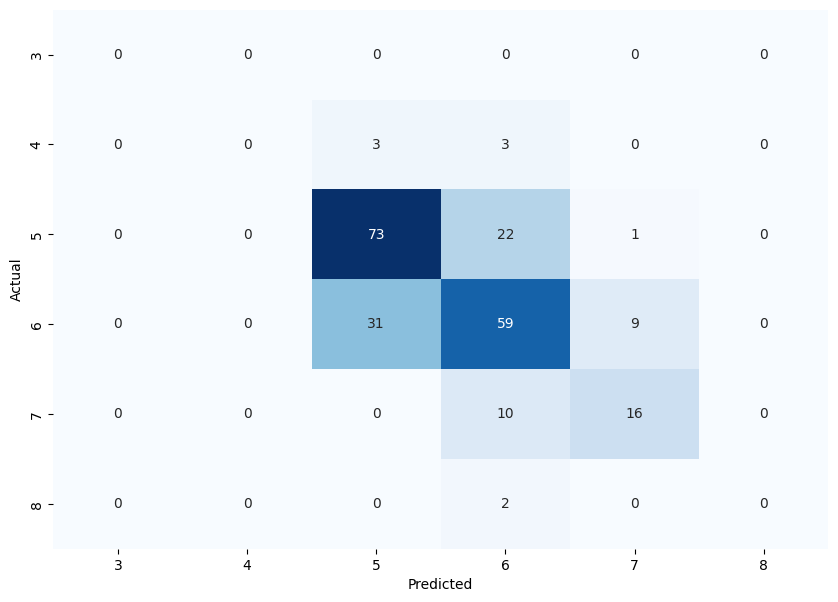

In [105]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Obtener todas las clases únicas en el conjunto de entrenamiento
y_train_ = le.inverse_transform(y_train)
classes = np.unique(y_train_)

# Predecir las clases del conjunto de prueba
y_pred_ = random_forest.predict(X_test)

y_pred = le.inverse_transform(y_pred_)
y_test = le.inverse_transform(y_test)

# Imprimir el reporte de clasificación
print(classification_report(y_test, y_pred, zero_division=0,labels=classes))



# Crear la matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred, labels=classes)

# Crear el mapa de calor
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


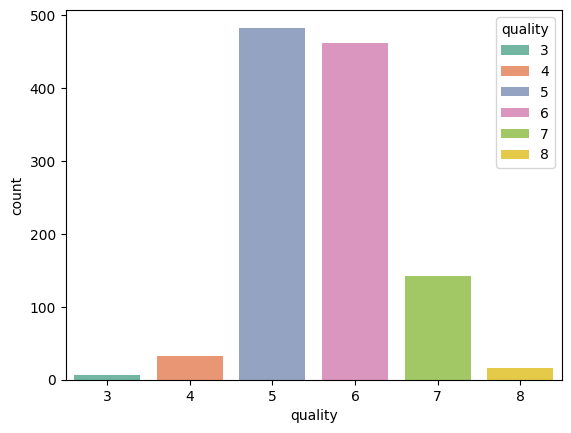

In [110]:
import seaborn as sns

# Diagrama de barras de la variable objetivo
sns.countplot(data=data, x='quality', palette='Set2', hue='quality')
plt.show()

**Conclusiones Finales:**

Como se puede observar en la matriz de confusión, el modelo Random Forest tiene un rendimiento muy bueno para las clases 5, 6 y 7, con una precisión del 0.71, 0.67, 0,69 respectivamente. Sin embargo, el rendimiento del modelo es bajo para las clases 3, 4 y 8, con una precisión de 0.0 para cada una de ellas. Esto se debe a que el dataset está desbalanceado, ya que la mayoría de los vinos tienen una calidad de 5, 6 o 7. Por lo tanto, el modelo tiene un rendimiento muy bueno para las clases 5, 6 y 7, pero un rendimiento muy bajo para las clases 3, 4 y 8.

En este caso, la puntuación F1 es una métrica de evaluación más adecuada que la precisión, ya que tiene en cuenta tanto la precisión como la exhaustividad (recall). La puntuación F1 del modelo Random Forest es 0.61, lo que indica que el modelo tiene un rendimiento medio para todas las clases.